In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import style
style.use('fivethirtyeight')

In [46]:
df = pd.read_csv('Tesla.csv')

In [47]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [49]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [50]:
df['High_Low_Percentage'] = (df['High'] - df['Low']) / df['Low'] * 100
df['Close_Open_Percentage'] = (df['Close'] - df['Open']) / df['Open'] * 100

In [51]:
dates = np.array(df.Date)
dates_check = dates[-30 : ]
dates = dates[: -30]

In [52]:
df = df[['High_Low_Percentage', 'Close_Open_Percentage', 'Adj Close', 'Volume']]

In [53]:
df.head()

,High_Low_Percentage,Close_Open_Percentage,Adj Close,Volume
0,42.531349,25.736837,23.889999,18766300
1,30.557946,-7.599848,23.830000,17187100
2,27.873705,-12.160004,21.959999,8218800
3,23.463395,-16.521735,19.200001,5139800
4,26.342388,-19.449995,16.110001,6866900


In [54]:
df['Price_Next_Month'] = df['Adj Close'].shift(-30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
X = np.array(df.drop(['Price_Next_Month'], axis = 1))
X = preprocessing.scale(X)
X_Check = X[-30 : ]
X = X[: -30]
df.dropna(inplace = True)
y = np.array(df['Price_Next_Month'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [57]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
print('Model accuracy: ', forest.score(X_test, y_test))

Model accuracy:  0.9578410759693055


In [58]:
# Fit the model again using the whole dataset
forest.fit(X, y)

RandomForestRegressor()

In [59]:
predictions = forest.predict(X_Check)

In [60]:
actual = pd.DataFrame(dates, columns = ['Date'])
actual['Close Price'] = df['Adj Close']
actual['Forecast'] = np.nan
actual.set_index('Date', inplace = True)
forecast = pd.DataFrame(dates_check, columns = ['Date'])
forecast['Forecast'] = predictions
forecast['Close Price'] = np.nan
forecast.set_index('Date', inplace = True)
var = [actual, forecast]
result = pd.concat(var)

Text(0, 0.5, 'Price')

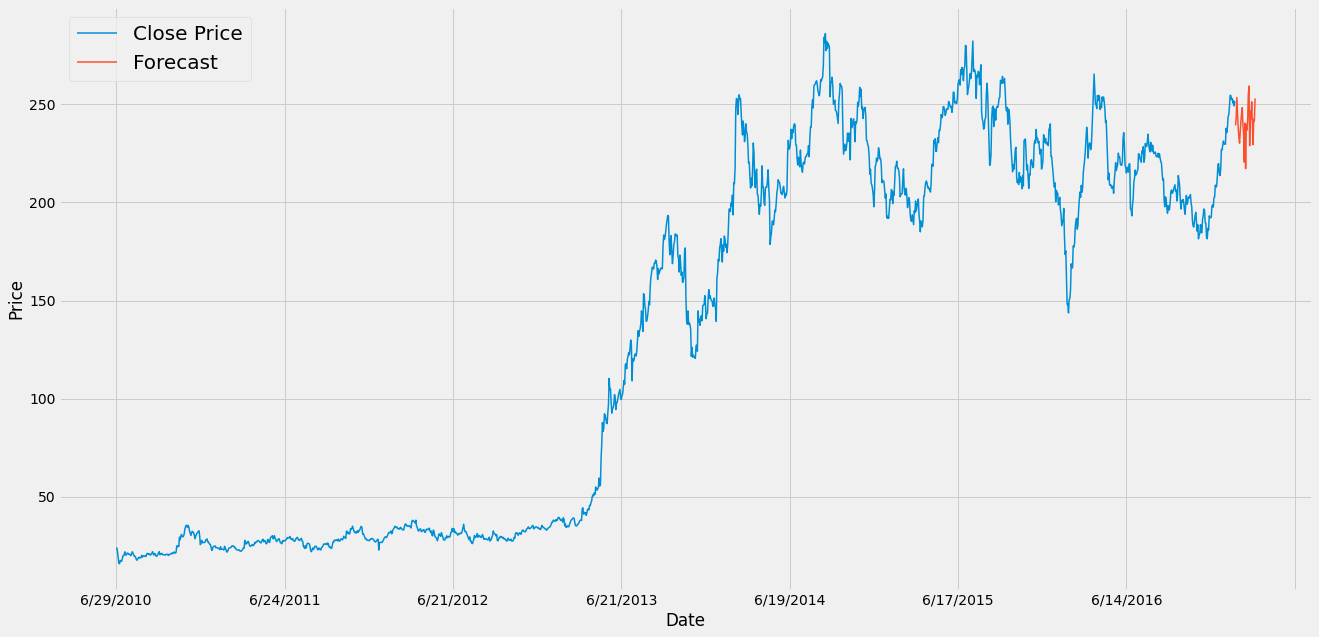

In [61]:
result.plot(figsize = (20, 10), linewidth = 1.5)
plt.legend(loc = 2, prop = {'size' : 20})
plt.xlabel('Date')
plt.ylabel('Price')